# 17 FORECASTING EXCHANGE RATES USING TIME SERIES ANALYSIS 

### Objective:
Leverage ARIMA and Exponential Smoothing techniques to forecast future exchange rates based on historical data provided in the exchange_rate.csv dataset. 


### Dataset:
The dataset contains historical exchange rate with each column representing a different currency rate over time. The first column indicates the date, and the second column represents exchange rates USD to Australian Dollar.

### Part 1: Data Preparation and Exploration
- 1.	Data Loading: Load the exchange_rate.csv dataset and parse the date column appropriately.
- 2.	Initial Exploration: Plot the time series for currency to understand their trends, seasonality, and any anomalies.
- 3.	Data Preprocessing: Handle any missing values or anomalies identified during the exploration phase.


#### 1. Data Loading: Load the exchange_rate.csv dataset and parse the date column appropriately.

In [1]:
#import important libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
plt.rcParams["figure.figsize"] = (12,5)

df =  pd.read_csv("exchange_rate.csv") #load data
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [2]:
df.info() #info of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [3]:
df.duplicated().sum() #check duplicates

0

In [4]:
df.describe().T #statistical summary of dataset

,count,mean,std,min,25%,50%,75%,max
Ex_rate,7588.0,0.776974,0.13662,0.483297,0.701422,0.761377,0.873477,1.102536


In [5]:
df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0],dayfirst=True) # Convert FIRST column to datetime (DD-MM-YYYY HH:MM)

In [6]:
df.set_index(df.columns[0], inplace=True) # Set first column as index

C:\Users\shivi\anaconda3\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


In [7]:
df.columns = ["USD_AUD"] # Rename exchange rate column

#### 2. Initial Exploration: Plot the time series for currency to understand their trends, seasonality, and any anomalies.

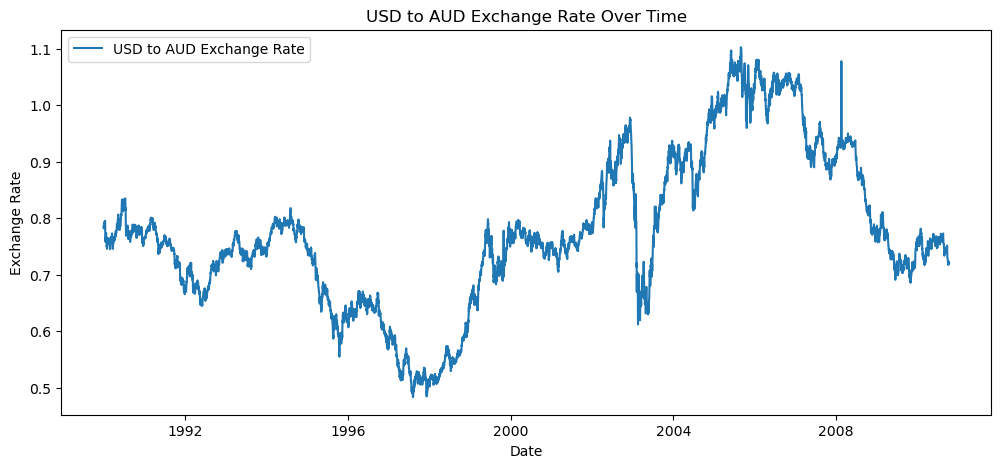

In [8]:
#Data Exploration
plt.plot(df, label="USD to AUD Exchange Rate")
plt.title("USD to AUD Exchange Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.legend()
plt.show()

#### 3. Data Preprocessing: Handle any missing values or anomalies identified during the exploration phase.

In [9]:
df.isnull().sum() #check null values

USD_AUD    0
dtype: int64

##### There is no any null value, so there is no need to handle null values

### Part 2: Model Building - ARIMA
- 1.	Parameter Selection for ARIMA: Utilize ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model for one or more currency time series.
- 2.	Model Fitting: Fit the ARIMA model with the selected parameters to the preprocessed time series.
- 3.	Diagnostics: Analyze the residuals to ensure there are no patterns that might indicate model inadequacies.
- 4.	Forecasting: Perform out-of-sample forecasting and visualize the predicted values against the actual values.


#### Parameter Selection for ARIMA: Utilize ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model for one or more currency time series.

In [10]:
#Stationarity Test (ADF)
adf_result = adfuller(df["USD_AUD"])

print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

# If p-value > 0.05 → non-stationary → differencing required

ADF Statistic: -1.6649941807381343
p-value: 0.44923273535979974


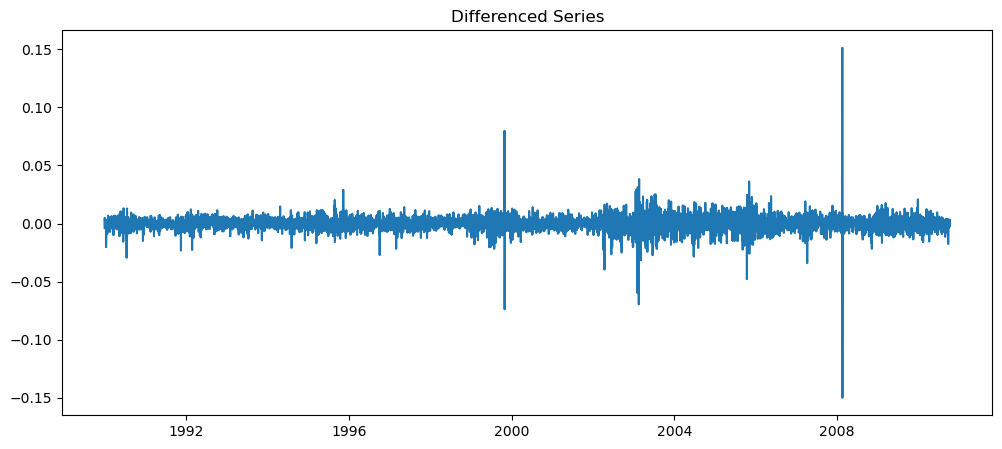

In [11]:
# Differencing
df_diff = df.diff().dropna()
plt.plot(df_diff)
plt.title("Differenced Series")
plt.show()

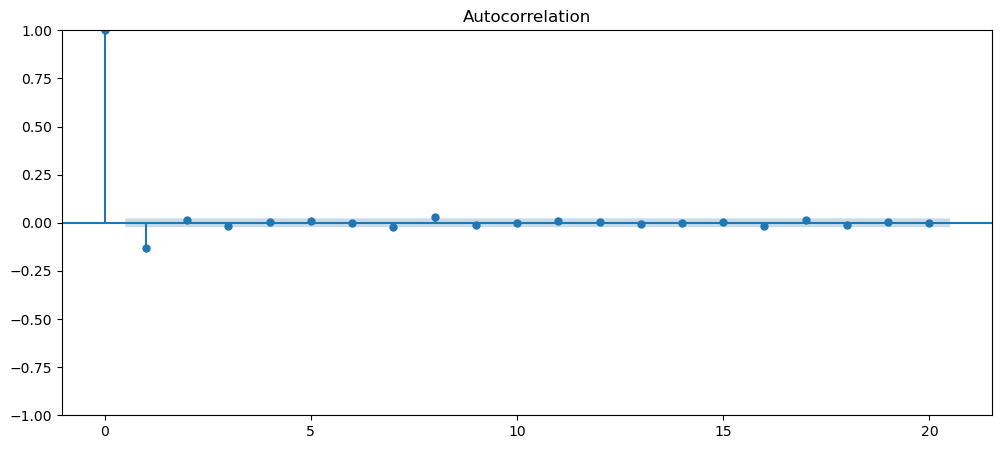

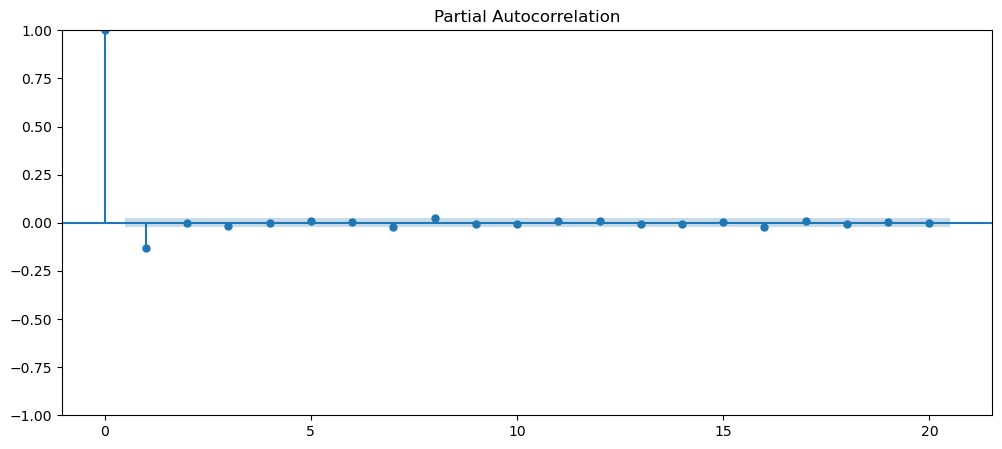

In [12]:
# ACF & PACF
plot_acf(df_diff, lags=20)
plt.show()
plot_pacf(df_diff, lags=20)
plt.show()
# Selected order: (1,1,1)

#### 2. Model Fitting: Fit the ARIMA model with the selected parameters to the preprocessed time series.

In [13]:
# Train-Test Split
train_size = int(len(df) * 0.8)
train = df.iloc[:train_size]
test = df.iloc[train_size:]
print("Train size:", len(train))
print("Test size :", len(test))

Train size: 6070
Test size : 1518


In [14]:
# ARIMA Model
arima_model = ARIMA(train, order=(1,1,1))
arima_fit = arima_model.fit()

print(arima_fit.summary())

C:\Users\shivi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\shivi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\shivi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                USD_AUD   No. Observations:                 6070
Model:                 ARIMA(1, 1, 1)   Log Likelihood               22719.046
Date:                Wed, 18 Feb 2026   AIC                         -45432.092
Time:                        13:18:52   BIC                         -45411.959
Sample:                    01-01-1990   HQIC                        -45425.104
                         - 08-14-2006                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5972      0.062     -9.648      0.000      -0.719      -0.476
ma.L1          0.5398      0.064      8.430      0.000       0.414       0.665
sigma2      3.281e-05   1.95e-07    168.198      0.0

#### 3. Diagnostics: Analyze the residuals to ensure there are no patterns that might indicate model inadequacies.

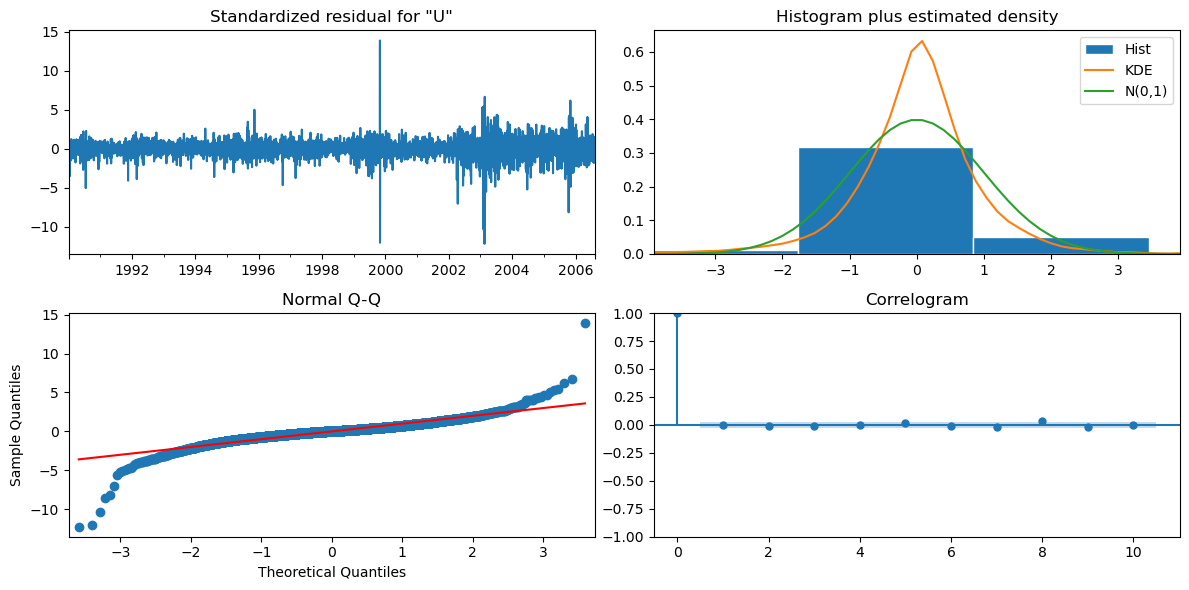

In [15]:
# Diagnostic plots
arima_fit.plot_diagnostics(figsize=(12, 6))
plt.tight_layout()
plt.show()

#### 4. Forecasting: Perform out-of-sample forecasting and visualize the predicted values against the actual values.

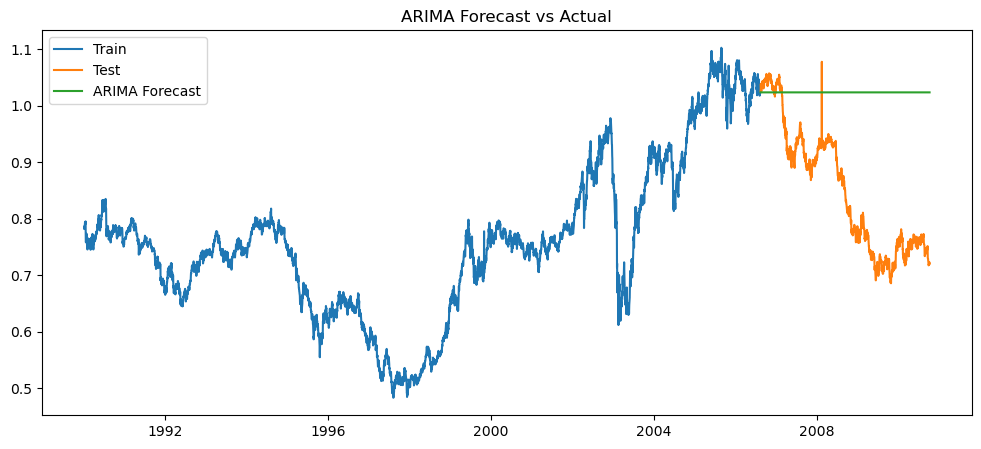

In [16]:
# ARIMA Forecast
arima_forecast = arima_fit.forecast(steps=len(test))

plt.plot(train, label="Train")
plt.plot(test, label="Test")
plt.plot(test.index, arima_forecast, label="ARIMA Forecast")
plt.title("ARIMA Forecast vs Actual")
plt.legend()
plt.show()

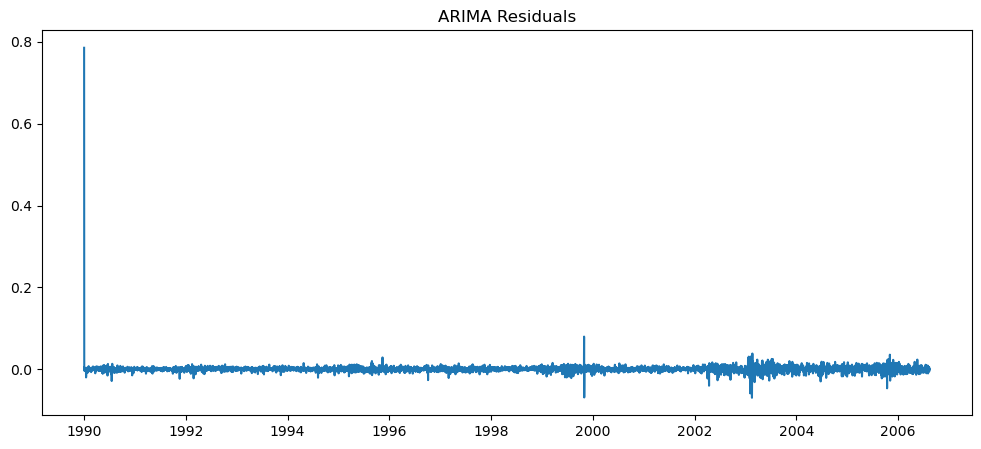

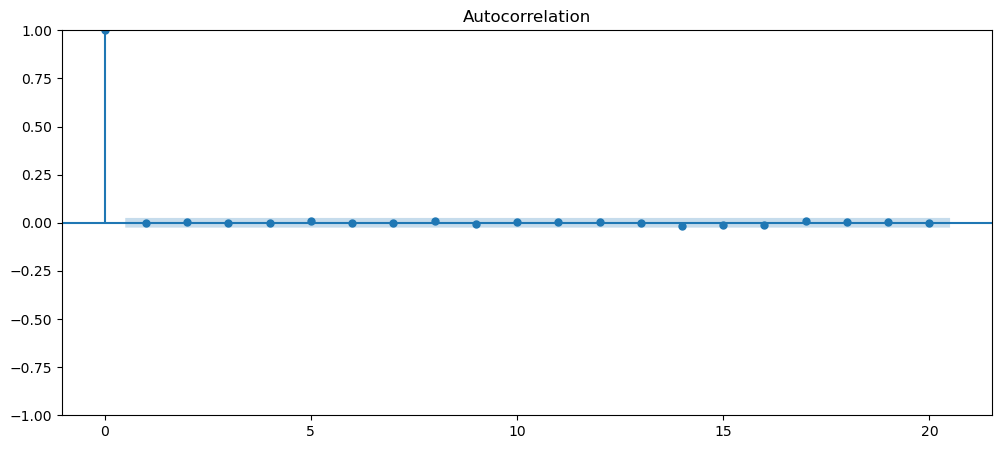

In [17]:
#Residual Diagnostics
residuals = arima_fit.resid
plt.plot(residuals)
plt.title("ARIMA Residuals")
plt.show()
plot_acf(residuals, lags=20)
plt.show()

In [18]:
# Exponential Smoothing
ets_model = ExponentialSmoothing(train,trend="add",seasonal=None)
ets_fit = ets_model.fit()

C:\Users\shivi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


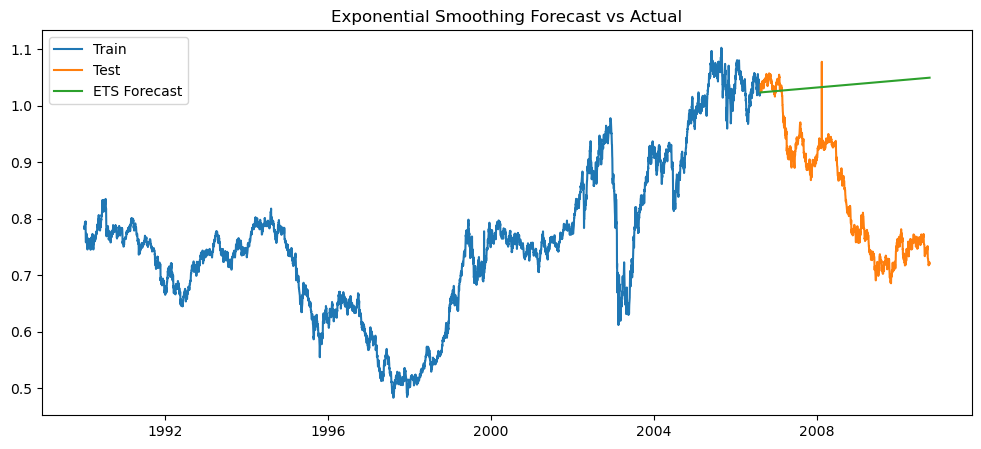

In [19]:
# ETS Forecast
ets_forecast = ets_fit.forecast(len(test))

plt.plot(train, label="Train")
plt.plot(test, label="Test")
plt.plot(test.index, ets_forecast, label="ETS Forecast")
plt.title("Exponential Smoothing Forecast vs Actual")
plt.legend()
plt.show()

### Part 3: Evaluation and Comparison
- 1.	Compute Error Metrics: Use metrics such as MAE, RMSE, and MAPE to evaluate the forecasts from both models.
- 2.	Model Comparison: Discuss the performance, advantages, and limitations of each model based on the observed results and error metrics.
- 3.	Conclusion: Summarize the findings and provide insights on which model(s) yielded the best performance for forecasting exchange rates in this dataset.


In [20]:
# Evaluation Metrics
def evaluate_model(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    return mae, rmse, mape


arima_mae, arima_rmse, arima_mape = evaluate_model(test, arima_forecast)
ets_mae, ets_rmse, ets_mape = evaluate_model(test, ets_forecast)

print("\nARIMA Performance")
print("MAE :", arima_mae)
print("RMSE:", arima_rmse)
print("MAPE:", arima_mape)

print("\nExponential Smoothing Performance")
print("MAE :", ets_mae)
print("RMSE:", ets_rmse)
print("MAPE:", ets_mape)



ARIMA Performance
MAE : 0.17770970449120707
RMSE: 0.20543669659668565
MAPE: nan

Exponential Smoothing Performance
MAE : 0.19027341286324018
RMSE: 0.2200851244999511
MAPE: nan


In [21]:
# Model Comparison
comparison = pd.DataFrame({
    "Model": ["ARIMA", "Exponential Smoothing"],
    "MAE": [arima_mae, ets_mae],
    "RMSE": [arima_rmse, ets_rmse],
    "MAPE": [arima_mape, ets_mape]
})

print("\nFinal Model Comparison")
print(comparison)


Final Model Comparison
                   Model       MAE      RMSE  MAPE
0                  ARIMA  0.177710  0.205437   NaN
1  Exponential Smoothing  0.190273  0.220085   NaN
